<Figure size 640x480 with 0 Axes>

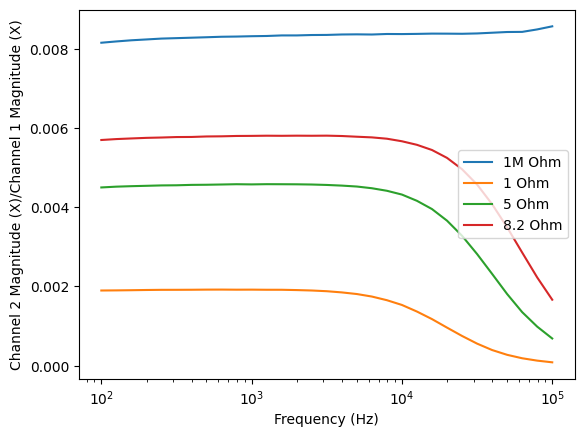

<Figure size 640x480 with 0 Axes>

In [41]:
#Get data from Lab2_Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read data from csv file and ignore the first 20 rows
wave1Mega = pd.read_csv('Lab2_Data\\part1\\1mohmdata.csv', skiprows=20)
wave1 = pd.read_csv('Lab2_Data\\part1\\1ohmdata.csv', skiprows=20)
wave5 = pd.read_csv('Lab2_Data\\part1\\5ohmdata.csv', skiprows=20)
wave8 = pd.read_csv('Lab2_Data\\part1\\8ohmdata.csv', skiprows=20)

#Columns of the data are: Frequency (Hz), Channel 1 Magnitude (X), Channel 2 Magnitude (X), Channel 2 Phase (deg)


#Plot the points of the above
plt.plot(wave1Mega['Frequency (Hz)'], wave1Mega['Channel 1 Magnitude (X)']/wave1Mega['Channel 2 Magnitude (X)'])
plt.plot(wave1['Frequency (Hz)'], wave1['Channel 1 Magnitude (X)']/wave1['Channel 2 Magnitude (X)'])
plt.plot(wave5['Frequency (Hz)'], wave5['Channel 1 Magnitude (X)']/wave5['Channel 2 Magnitude (X)'])
plt.plot(wave8['Frequency (Hz)'], wave8['Channel 1 Magnitude (X)']/wave8['Channel 2 Magnitude (X)'])
plt.legend(['1M Ohm', '1 Ohm', '5 Ohm', '8.2 Ohm'])

plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Channel 1 Magnitude (X)/Channel 2 Magnitude (X)')



Text(0, 0.5, 'Real Impedance (Ohm)')

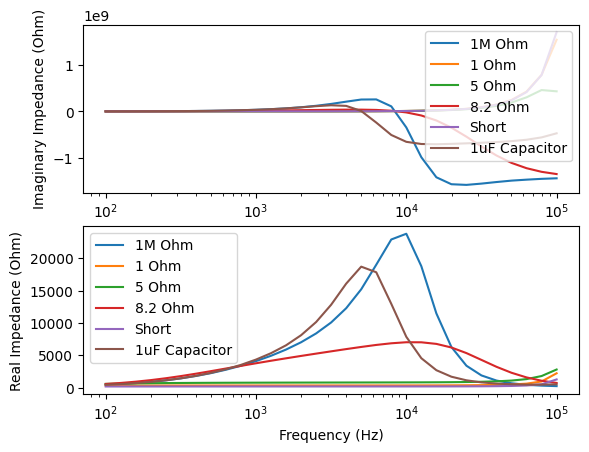

In [120]:
#Part 2 Transformer input inductance versus frequency using open circuit measurements

#Read data from csv file and ignore the first 30 rows
wave1Mega = pd.read_csv('Lab2_Data\\part2\\1mohmdata.csv')
wave1 = pd.read_csv('Lab2_Data\\part2\\z1ohmdata.csv')
wave5 = pd.read_csv('Lab2_Data\\part2\\z5ohmdata.csv')
wave8 = pd.read_csv('Lab2_Data\\part2\\z8ohmdata.csv')
waveShort = pd.read_csv('Lab2_Data\\part2\\zshort.csv')
waveCap = pd.read_csv('Lab2_Data\\part2\\capdata.csv')

#Columns of the data are: Frequency (Hz),Trace th (deg),Trace |Z| (Ohm),Trace Rs (Ohm),Trace Xs (Ohm)
#Img(Z) = (2 * pi * frequency)Xs, Real(Z) = Rs
plt.subplot(2,1,1)
plt.plot(wave1Mega['Frequency (Hz)'], wave1Mega['Trace Xs (Ohm)']*(2*np.pi*wave1Mega['Frequency (Hz)']))
plt.plot(wave1['Frequency (Hz)'], wave1['Trace Xs (Ohm)']*(2*np.pi*wave1['Frequency (Hz)']))
plt.plot(wave5['Frequency (Hz)'], wave5['Trace Xs (Ohm)']*(2*np.pi*wave5['Frequency (Hz)']))
plt.plot(wave8['Frequency (Hz)'], wave8['Trace Xs (Ohm)']*(2*np.pi*wave8['Frequency (Hz)']))
plt.plot(waveShort['Frequency (Hz)'], waveShort['Trace Xs (Ohm)']*(2*np.pi*waveShort['Frequency (Hz)']))
plt.plot(waveCap['Frequency (Hz)'], waveCap['Trace Xs (Ohm)']*(2*np.pi*waveCap['Frequency (Hz)']))
plt.legend(['1M Ohm', '1 Ohm', '5 Ohm', '8.2 Ohm', 'Short', "1uF Capacitor"])

plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Imaginary Impedance (Ohm)')

plt.subplot(2,1,2)
plt.plot(wave1Mega['Frequency (Hz)'], wave1Mega['Trace Rs (Ohm)'])
plt.plot(wave1['Frequency (Hz)'], wave1['Trace Rs (Ohm)'])
plt.plot(wave5['Frequency (Hz)'], wave5['Trace Rs (Ohm)'])
plt.plot(wave8['Frequency (Hz)'], wave8['Trace Rs (Ohm)'])
plt.plot(waveShort['Frequency (Hz)'], waveShort['Trace Rs (Ohm)'])
plt.plot(waveCap['Frequency (Hz)'], waveCap['Trace Rs (Ohm)'])
plt.legend(['1M Ohm', '1 Ohm', '5 Ohm', '8.2 Ohm', 'Short', "1uF Capacitor"])
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Real Impedance (Ohm)')

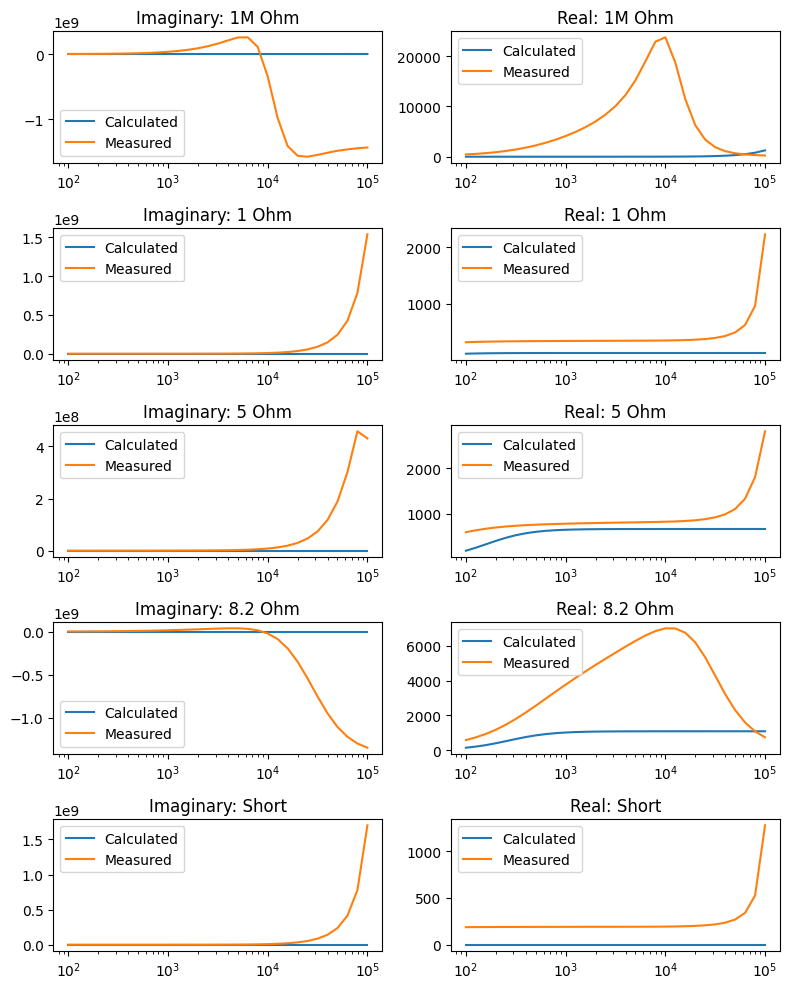

In [128]:
from rich import print
#Read data from csv file and ignore the first 30 rows
wave1Mega = pd.read_csv('Lab2_Data\\part2\\1mohmdata.csv')
wave1 = pd.read_csv('Lab2_Data\\part2\\z1ohmdata.csv')
wave5 = pd.read_csv('Lab2_Data\\part2\\z5ohmdata.csv')
wave8 = pd.read_csv('Lab2_Data\\part2\\z8ohmdata.csv')
waveShort = pd.read_csv('Lab2_Data\\part2\\zshort.csv')
waveCap = pd.read_csv('Lab2_Data\\part2\\capdata.csv')


L_1 = .65
L_2 = .00492
M = .05653


to_plot = [wave1Mega, wave1, wave5, wave8, waveShort]
actualResistance = [1e6, 1, 5, 8.2, 0]
names = ['1M Ohm', '1 Ohm', '5 Ohm', '8.2 Ohm', 'Short']

plt.figure(figsize=(8, 10))

for i in range(len(to_plot)):
    Z_L = actualResistance[i]
    plot = to_plot[i]

    #Make 2 plot on the same row
    plt.subplot(5,2,i * 2+ 1)
    omega = 2 * np.pi * plot['Frequency (Hz)']
    Img_Z = omega * (L_1 - (np.power((omega * M),2) * L_2)/(np.power((omega * L_2),2) + np.power(Z_L,2)))
    Re_Z = np.power((omega * M),2) * Z_L / (np.power((omega * L_2),2) + np.power(Z_L,2))

    #Add the imaginary and real parts to the plot dataframe
    plot['Calculated_Xs'] = Img_Z
    plot['Calculated_Rs'] = Re_Z

    #Drop col "Trace th (deg)" and "Trace |Z| (Ohm)"
    plot = plot.drop(columns=['Trace th (deg)'])

    plt.plot(plot['Frequency (Hz)'], Img_Z)
    plt.plot(plot['Frequency (Hz)'], plot['Trace Xs (Ohm)']* omega)
    #Make it log
    plt.xscale('log')
    plt.legend(['Calculated', 'Measured'])
    plt.title("Imaginary: " + names[i])

    plt.subplot(5,2,i * 2 + 2)
    plt.plot(plot['Frequency (Hz)'], Re_Z)
    plt.plot(plot['Frequency (Hz)'], plot['Trace Rs (Ohm)'])
    #Make it log
    plt.xscale('log')
    plt.legend(['Calculated', 'Measured'])
    plt.title("Real: " + names[i])
plt.tight_layout()
plt.show()

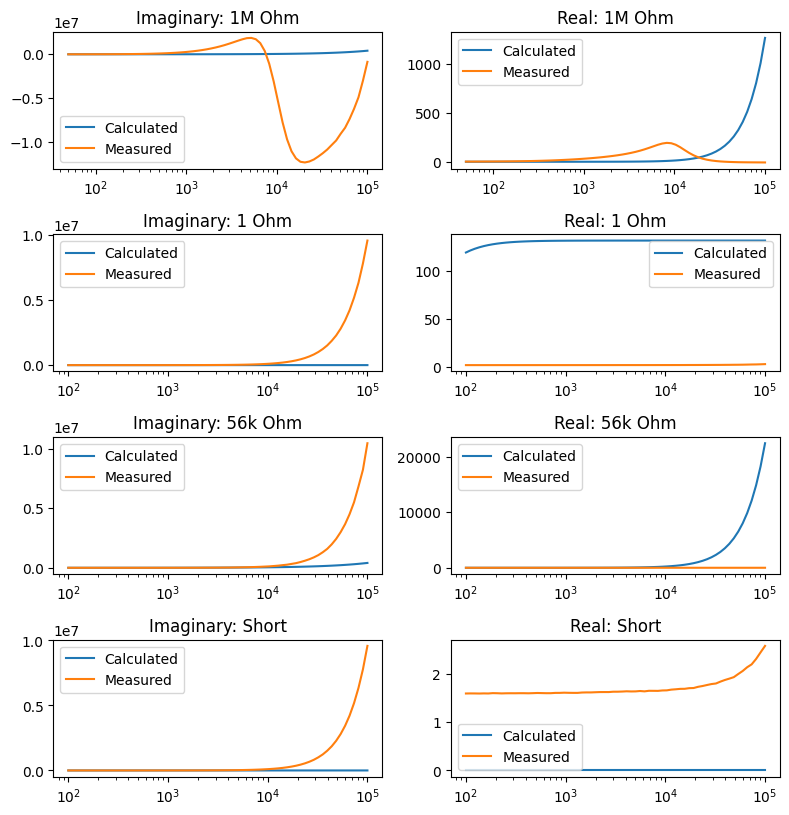

In [132]:
from rich import print
#Read data from csv file and ignore the first 30 rows
wave1Mega = pd.read_csv('Lab2_Data\\part3\\z1mohmdata.csv', skiprows=30)
wave1 = pd.read_csv('Lab2_Data\\part3\\z1ohmdata.csv', skiprows=30)
wave56k = pd.read_csv('Lab2_Data\\part3\\z56kohmdata.csv', skiprows=30)
waveShort = pd.read_csv('Lab2_Data\\part3\\zshortdata.csv', skiprows=30)


L_1 = .65
L_2 = .00492
M = .05653

to_plot = [wave1Mega, wave1, wave56k, waveShort]
actualResistance = [1e6, 1, 56e3, 0]
names = ['1M Ohm', '1 Ohm', '56k Ohm', 'Short']

plt.figure(figsize=(8, 10))

for i in range(len(to_plot)):
    Z_L = actualResistance[i]
    plot = to_plot[i]

    #Make 2 plot on the same row
    plt.subplot(5,2,i * 2+ 1)
    omega = 2 * np.pi * plot['Frequency (Hz)']
    Img_Z = omega * (L_1 - (np.power((omega * M),2) * L_2)/(np.power((omega * L_2),2) + np.power(Z_L,2)))
    Re_Z = np.power((omega * M),2) * Z_L / (np.power((omega * L_2),2) + np.power(Z_L,2))

    #Add the imaginary and real parts to the plot dataframe
    plot['Calculated_Xs'] = Img_Z
    plot['Calculated_Rs'] = Re_Z

    #Drop col "Trace th (deg)" and "Trace |Z| (Ohm)"
    plot = plot.drop(columns=['Trace th (deg)'])

    plt.plot(plot['Frequency (Hz)'], Img_Z)
    plt.plot(plot['Frequency (Hz)'], plot['Trace Xs (Ohm)'] * omega)
    #Make it log
    plt.xscale('log')
    plt.legend(['Calculated', 'Measured'])
    plt.title("Imaginary: " + names[i])

    plt.subplot(5,2,i * 2 + 2)
    plt.plot(plot['Frequency (Hz)'], Re_Z)
    plt.plot(plot['Frequency (Hz)'], plot['Trace Rs (Ohm)'])
    #Make it log
    plt.xscale('log')
    plt.legend(['Calculated', 'Measured'])
    plt.title("Real: " + names[i])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Real Impedance (Ohm)')

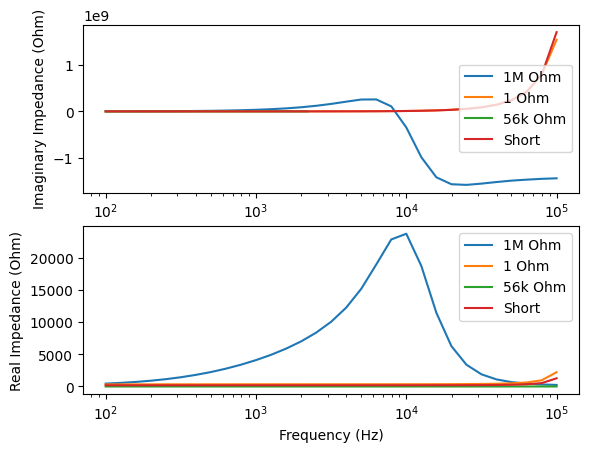

In [122]:
to_plot = [wave1Mega, wave1, wave56k, waveShort]

plt.subplot(2,1,1)
for plot in to_plot:
    plt.plot(plot['Frequency (Hz)'], plot['Trace Xs (Ohm)']*(2*np.pi*wave1Mega['Frequency (Hz)']))
plt.legend(['1M Ohm', '1 Ohm', '56k Ohm', 'Short'])

plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Imaginary Impedance (Ohm)')

plt.subplot(2,1,2)
for plot in to_plot:
    plt.plot(plot['Frequency (Hz)'], plot['Trace Rs (Ohm)'])
plt.legend(['1M Ohm', '1 Ohm', '56k Ohm', 'Short'])

plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Real Impedance (Ohm)')